<a href="https://colab.research.google.com/github/srewashimondal/ReadMe/blob/main/book_rec_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"watercooler123","key":"f56683418c4feaf43038b3749677e72a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d dk123891/books-dataset-goodreadsmay-2024

Dataset URL: https://www.kaggle.com/datasets/dk123891/books-dataset-goodreadsmay-2024
License(s): MIT
 74% 51.0M/68.9M [00:00<00:00, 263MB/s]
100% 68.9M/68.9M [00:00<00:00, 233MB/s]


In [4]:
#Unzip the dataset
!unzip books-dataset-goodreadsmay-2024.zip

Archive:  books-dataset-goodreadsmay-2024.zip
  inflating: Book_Details.csv        
  inflating: book_reviews.db         
  inflating: books.db                


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Book_Details.csv")

# Preview the data
df.head(10)

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."
5,5,8,https://images-na.ssl-images-amazon.com/images...,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...,"['2690 pages, Paperback']","['First published October 1, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['2690'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",148443,313,4.72,"{'5': '120,035', '4': '19,721', '3': '5,489', ..."
6,6,10,https://images-na.ssl-images-amazon.com/images...,Harry Potter Collection,"Six years of magic, adventure, and mystery mak...","['3342 pages, Hardcover']","['First published January 1, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['3342'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",32990,974,4.72,"{'5': '26,491', '4': '4,731', '3': '1,183', '2..."
7,7,11,https://images-na.ssl-images-amazon.com/images...,The Hitchhiker’s Guide to the Galaxy,Seconds before the Earth is demolished to make...,"['216 pages, Mass Market Paperback']","['First published October 12, 1979']",https://www.goodreads.com/author/show/4.Dougla...,Douglas Adams,['216'],"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",1849362,46122,4.23,"{'5': '936,656', '4': '544,512', '3': '256,245..."
8,8,13,https://images-na.ssl-images-amazon.com/images...,The Ultimate Hitchhiker’s Guide to the Galaxy,"At last in paperback in one complete volume, h...","['815 pages, Paperback']","['First published January 17, 1996']",https://www.goodreads.com/author/show/4.Dougla...,Douglas Adams,['815'],"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",323845,6355,4.38,"{'5': '187,914', '4': '88,512', '3': '34,756',..."
9,9,21,https://images-na.ssl-images-amazon.com/images...,A Short History of Nearly Everything,Bill Bryson describes himself as a reluctant t...,"['544 pages, Paperback']","['

In [6]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16225 non-null  int64  
 1   book_id              16225 non-null  int64  
 2   cover_image_uri      16225 non-null  object 
 3   book_title           16225 non-null  object 
 4   book_details         16177 non-null  object 
 5   format               16225 non-null  object 
 6   publication_info     16225 non-null  object 
 7   authorlink           16225 non-null  object 
 8   author               16225 non-null  object 
 9   num_pages            16225 non-null  object 
 10  genres               16225 non-null  object 
 11  num_ratings          16225 non-null  int64  
 12  num_reviews          16225 non-null  int64  
 13  average_rating       16225 non-null  float64
 14  rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(4), object(10)


Index(['Unnamed: 0', 'book_id', 'cover_image_uri', 'book_title',
       'book_details', 'format', 'publication_info', 'authorlink', 'author',
       'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating',
       'rating_distribution'],
      dtype='object')

In [7]:
df = df[['book_title', 'book_details', 'publication_info', 'author', 'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating']]
# Drop rows where any of the key columns are missing
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fill missing descriptions
df['book_details'] = df['book_details'].fillna('')
df['genres'] = df['genres'].fillna('')
df['publication_info'] = df['publication_info'].fillna('')
df['combined_text'] = df['book_title'] + ' ' + df['publication_info'] + '' + df['genres'] + ' ' + df['book_details']
df['combined_text'] = df['combined_text'].str.lower().str.strip()

In [9]:
# TDIF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_text'])


In [10]:
def recommend_books(user_input, top_n=5):
    user_input = user_input.lower().strip()
    user_vec = tfidf.transform([user_input])
    similarity = cosine_similarity(user_vec, tfidf_matrix).flatten()
    top_indices = similarity.argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['book_title', 'author', 'genres', 'average_rating']]

In [11]:
recommend_books("looking for magical fantasy with dragons and battles")

,book_title,author,genres,average_rating
5644,Eye of the Oracle,Bryan Davis,"['Fantasy', 'Dragons', 'Christian', 'Christian...",4.13
3822,The Enchanted Forest Chronicles,Patricia C. Wrede,"['Fantasy', 'Young Adult', 'Fiction', 'Dragons...",4.50
6165,The Fire Within,Chris d'Lacey,"['Fantasy', 'Dragons', 'Young Adult', 'Fiction...",3.80
4939,Dealing with Dragons,Patricia C. Wrede,"['Fantasy', 'Young Adult', 'Dragons', 'Fiction...",4.16
10316,The Dragon Keeper,Robin Hobb,"['Fantasy', 'Dragons', 'Fiction', 'Epic Fantas...",3.96


Now KNN

In [12]:
 #Step 1: Preprocess and Vectorize Book Descriptions

from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NAs in book_details
df['book_details'] = df['book_details'].fillna('')
df['genres'] = df['genres'].fillna('')
df['publication_info'] = df['publication_info'].fillna('')
df['combined_text'] = df['book_title'] + ' ' + df['publication_info'] + '' + df['genres'] + ' ' + df['book_details']
df['combined_text'] = df['combined_text'].str.lower().str.strip()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['combined_text'])

# Target = average_rating
y = df['average_rating']

In [124]:
#Step 2: KNN Model + Train-Test Split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# R squared was higher without scaling
# Feature scaling
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=23, weights='distance',  metric='cosine')
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.09061420085218296
R-squared Score: 0.13730307202283576


In [138]:
#PCA to expand the input space
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # keep 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
r2 = r2_score(y_test, knn.predict(X_test_pca))
print("PCA + KNN R²:", r2)

PCA + KNN R²: -0.4554144989884139


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Linear R²:", r2_score(y_test, linreg.predict(X_test)))

Linear R²: -0.23092702929559694


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 51))}
grid = GridSearchCV(KNeighborsRegressor(metric='manhattan'), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_['n_neighbors'])
print("Best CV R²:", grid.best_score_)

Best k: 35
Best CV R²: -0.00844272181207797


In [19]:
#Step 3: K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Set up K-Fold (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score with neg_mean_squared_error (since scoring expects higher = better)
scores = cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-validated RMSE scores: [0.30519227 0.31220009 0.31761496 0.30177756 0.3039415 ]
Average RMSE: 0.30814527710337647


Analysis of the scores above:
- Mean Squared Error (MSE): 0.0925
- R² Score:  0.1192
- Average RMSE: 0.3358

R² Score ≈ -0.02
This means the KNN model performs slightly worse than just predicting the mean rating.
Ideally, R² should be closer to 1 (good fit) or at least positive.

 RMSE ≈ 0.33
On a rating scale (usually 1 to 5 or 1 to 10), this is not terrible, but also not great.
Lower RMSE = better. A value around 0.2–0.3 would be decent for simple models like this.

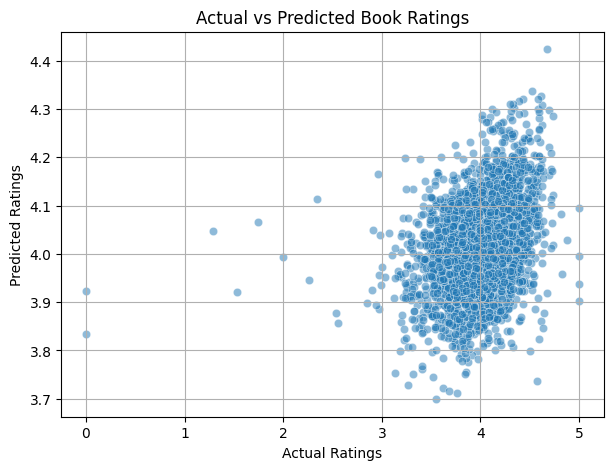

In [20]:
#Predicted vs. Actual Ratings Plot
#Shows how well your model's predictions match the real ratings.

import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of actual vs predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Book Ratings")
plt.grid(True)
plt.show()

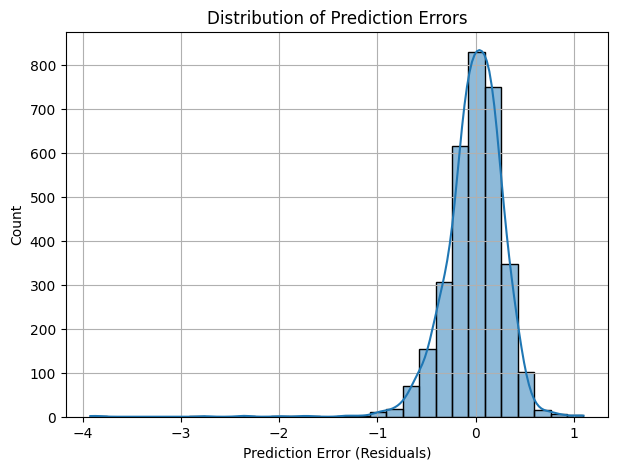

In [21]:
# Histogram of Prediction Errors (Residuals)
# Shows how far off our predictions were from the real ratings.

# Error = actual - predicted
errors = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Residuals)")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

What We  Should Compare Across Models:
Use these 3 key metrics:

Metric	Meaning	Use
- MSE (Mean Squared Error)	Avg. squared difference	Lower = better
- R² Score	How well model fits data	Closer to 1 = better
- Cross-Validated RMSE	Generalizability	Lower = more robust